## 1 迭代法计算板内稳定的温度场

我们要求解齐次Possion方程，因为其处于稳态热传导（无热源），故求解方程可写为：
$$ \frac{\partial^2T}{\partial x^2}+\frac{\partial^2T}{\partial y^2} =0 $$

In [23]:
import time
def draw(nx,ny,Temperature,Length=0.15,Height=0.12):
    plt.figure(figsize=(8,6))
    Time=time.time()
    xaxis,yaxis=np.meshgrid(np.linspace(0,Length,nx),np.linspace(0,Height,ny))
    cf=plt.contourf(xaxis,yaxis,Temperature,levels=40,cmap='inferno')
    plt.colorbar(cf)
    plt.title("Temperature Contours")
    plt.xlabel("x(meter)")
    plt.ylabel("y(meter)")
    plt.savefig(f"Results_{Time}.png")
    plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#setting
L,H=0.15,0.12
iter=10000
tolerance=1e-5
num_x,num_y=80,60
dx=L/num_x
dy=H/num_y
T=20*np.ones((num_y,num_x))
T[:,0]=T[:,-1]=T[-1,:]=20
T[0,:]=100
beta=dx/dy

#choose G-S iteration (in this case, w=1)
for numi in range(iter):
    Temp=T.copy()
    for i in range(1,num_y-1):
        for j in range(1,num_x-1):
            T[i,j]=(0.5/(1+beta**2))*(T[i+1,j]+T[i-1,j]+beta**2*(T[i,j+1]+T[i,j-1]))

    error=np.linalg.norm(T-Temp,ord=2)
    if error<tolerance:
        print(f"Finished at {numi}")
        break               

Finished at 5640


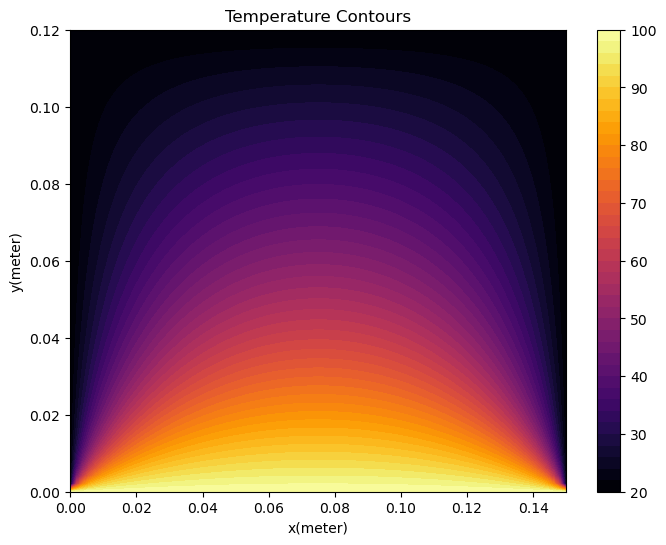

In [25]:
draw(num_x,num_y,T)

## 2 采用不同的松弛因子

Finished at 5640
Finished at 4684
Finished at 3873
Finished at 3175
Finished at 2565
Finished at 2026
Finished at 1543
Finished at 1104
Finished at 695
Finished at 269


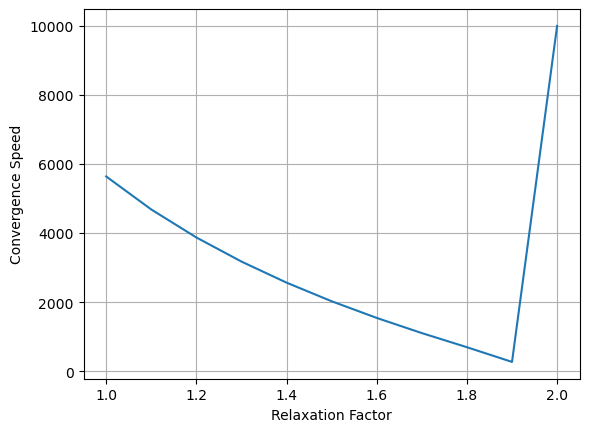

In [27]:
L,H=0.15,0.12
iter=10000
tolerance=1e-5
num_x,num_y=80,60
dx=L/num_x
dy=H/num_y
beta=dx/dy

def changing(omega):
    T=20*np.ones((num_y,num_x))
    T[:,0]=T[:,-1]=T[-1,:]=20
    T[0,:]=100
    for numi in range(iter):
        Temp=T.copy()
        for i in range(1,num_y-1):
            for j in range(1,num_x-1):
                T[i,j]=(1-omega)*T[i,j]+omega/(2*(1+beta**2))*(T[i+1,j]+T[i-1,j]+beta**2*(T[i,j+1]+T[i,j-1]))
    
        error=np.linalg.norm(T-Temp,ord=2)
        if error<tolerance:
            print(f"Finished at {numi}")
            return numi
    return iter

omegas=np.arange(1,2.1,0.1)
Count=[]
for omega in omegas:
    count=changing(omega)
    Count.append(count)

plt.plot(omegas,Count)
plt.xlabel("Relaxation Factor")
plt.ylabel("Convergence Speed")
plt.grid(True)
plt.savefig("Convergence Speed")
plt.show()

### 3 采用不同的网格尺度

In [31]:
def changing_with_grid(omega,num_x,num_y,beta,iter,tolerance):
    T=20*np.ones((num_y,num_x))
    T[:,0]=T[:,-1]=T[-1,:]=20
    T[0,:]=100
    for numi in range(iter):
        Temp=T.copy()
        for i in range(1,num_y-1):
            for j in range(1,num_x-1):
                T[i,j]=(1-omega)*T[i,j]+omega/(2*(1+beta**2))*(T[i+1,j]+T[i-1,j]+beta**2*(T[i,j+1]+T[i,j-1]))
    
        error=np.linalg.norm(T-Temp,ord=2)
        if error<tolerance:
            print(f"Finished at {numi}")
            return numi
    return iter

Finished at 1439
Finished at 1193
Finished at 984
Finished at 804
Finished at 646
Finished at 507
Finished at 380
Finished at 263
Finished at 143
Finished at 167
Finished at 1519
Finished at 1259
Finished at 1038
Finished at 848
Finished at 682
Finished at 535
Finished at 402
Finished at 279
Finished at 154
Finished at 163
Finished at 5640
Finished at 4684
Finished at 3873
Finished at 3175
Finished at 2565
Finished at 2026
Finished at 1543
Finished at 1104
Finished at 695
Finished at 269
Finished at 9507
Finished at 7901
Finished at 6539
Finished at 5365
Finished at 4339
Finished at 3432
Finished at 2620
Finished at 1883
Finished at 1201
Finished at 535


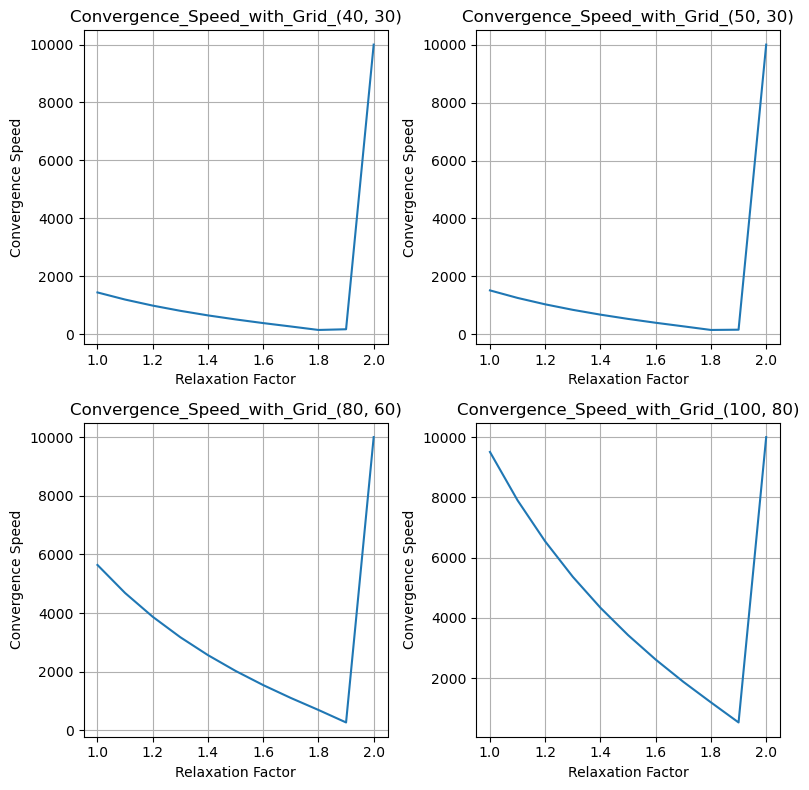

In [33]:
Grids=[(40,30),(50,30),(80,60),(100,80)]
column,row=2,2
fig,axes = plt.subplots(row,column,figsize=(4*column, 4*row))
axes=axes.flatten()
for index,grid in enumerate(Grids):
    L,H=0.15,0.12
    iter=10000
    tolerance=1e-5
    num_x,num_y=grid
    dx=L/num_x
    dy=H/num_y
    beta=dx/dy

    omegas=np.arange(1,2.1,0.1)
    Count=[]

    for omega in omegas:
        count=changing_with_grid(omega,num_x,num_y,beta,iter,tolerance)
        Count.append(count)

    ax=axes[index]
    ax.plot(omegas,Count)
    ax.set_xlabel("Relaxation Factor")
    ax.set_ylabel("Convergence Speed")
    ax.set_title(f"Convergence_Speed_with_Grid_{grid}")
    ax.grid(True)

plt.tight_layout()
plt.savefig("Convergence_Speed_with_Different_Grids")
plt.show()